### TDE Reproduction
Attempt to reproduce TDE work https://arxiv.org/pdf/1810.09507.pdf

The following analysis was done using AllWISE, GALEX, and SDSS data from THEx-catalog.v0_0_4. The model is creating a 5-dimensional Gaussian Kernel Density Estimate (KDE) for each class. The classes are simply 'TDE' and 'Other', where any class that is not TDE is recategorized as 'Other'. The classes are very imbalanced, however the model is using uniform priors and thus does not use information on frequency of class in the prediction. The features are reduced using PCA to 5 principal components.

The plots and print-outs below describe the dataset and performance per class.


Data Filters
------------------
num_runs : 1
test_on_train : False
folds : 3
data_split : 0.3
hierarchical_model : False
top_classes : None
one_all : ['TDE']
subsample : None
transform_features : True
transform_labels : True
incl_redshift : True
pca : 5
naive : False

Features
------------------
NED_GALEX_FUV, NED_GALEX_NUV, NED_SDSS_u, NED_SDSS_g, NED_SDSS_r, NED_SDSS_i, NED_SDSS_z, AllWISE_W1mag, AllWISE_W2mag, AllWISE_W3mag, AllWISE_W4mag, AllWISE_Jmag, AllWISE_Hmag, AllWISE_Kmag, AllWISE_IsExtSrc


Constructing Class Hierarchy Tree...
Node: Ia Pec has already been assigned parent: I Pec
Node: Ia-02cx has already been assigned parent: Ia
Node: Ia-HV has already been assigned parent: Ia
Node: Ib has already been assigned parent: I
Node: Ic has already been assigned parent: I
Node: Ia/c has already been assigned parent: Ia
Node: II P-97D has already been assigned parent: II Pec
Node: IIn P has already been assigned parent: II P
Node: IIn L has already been assigned parent: II L
Node:

/Users/marina/research/astro_research/code/thex_model/thex_data/data_clean.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[TARGET_LABEL] = df[TARGET_LABEL].apply(lambda x: int(cat_code[x]))


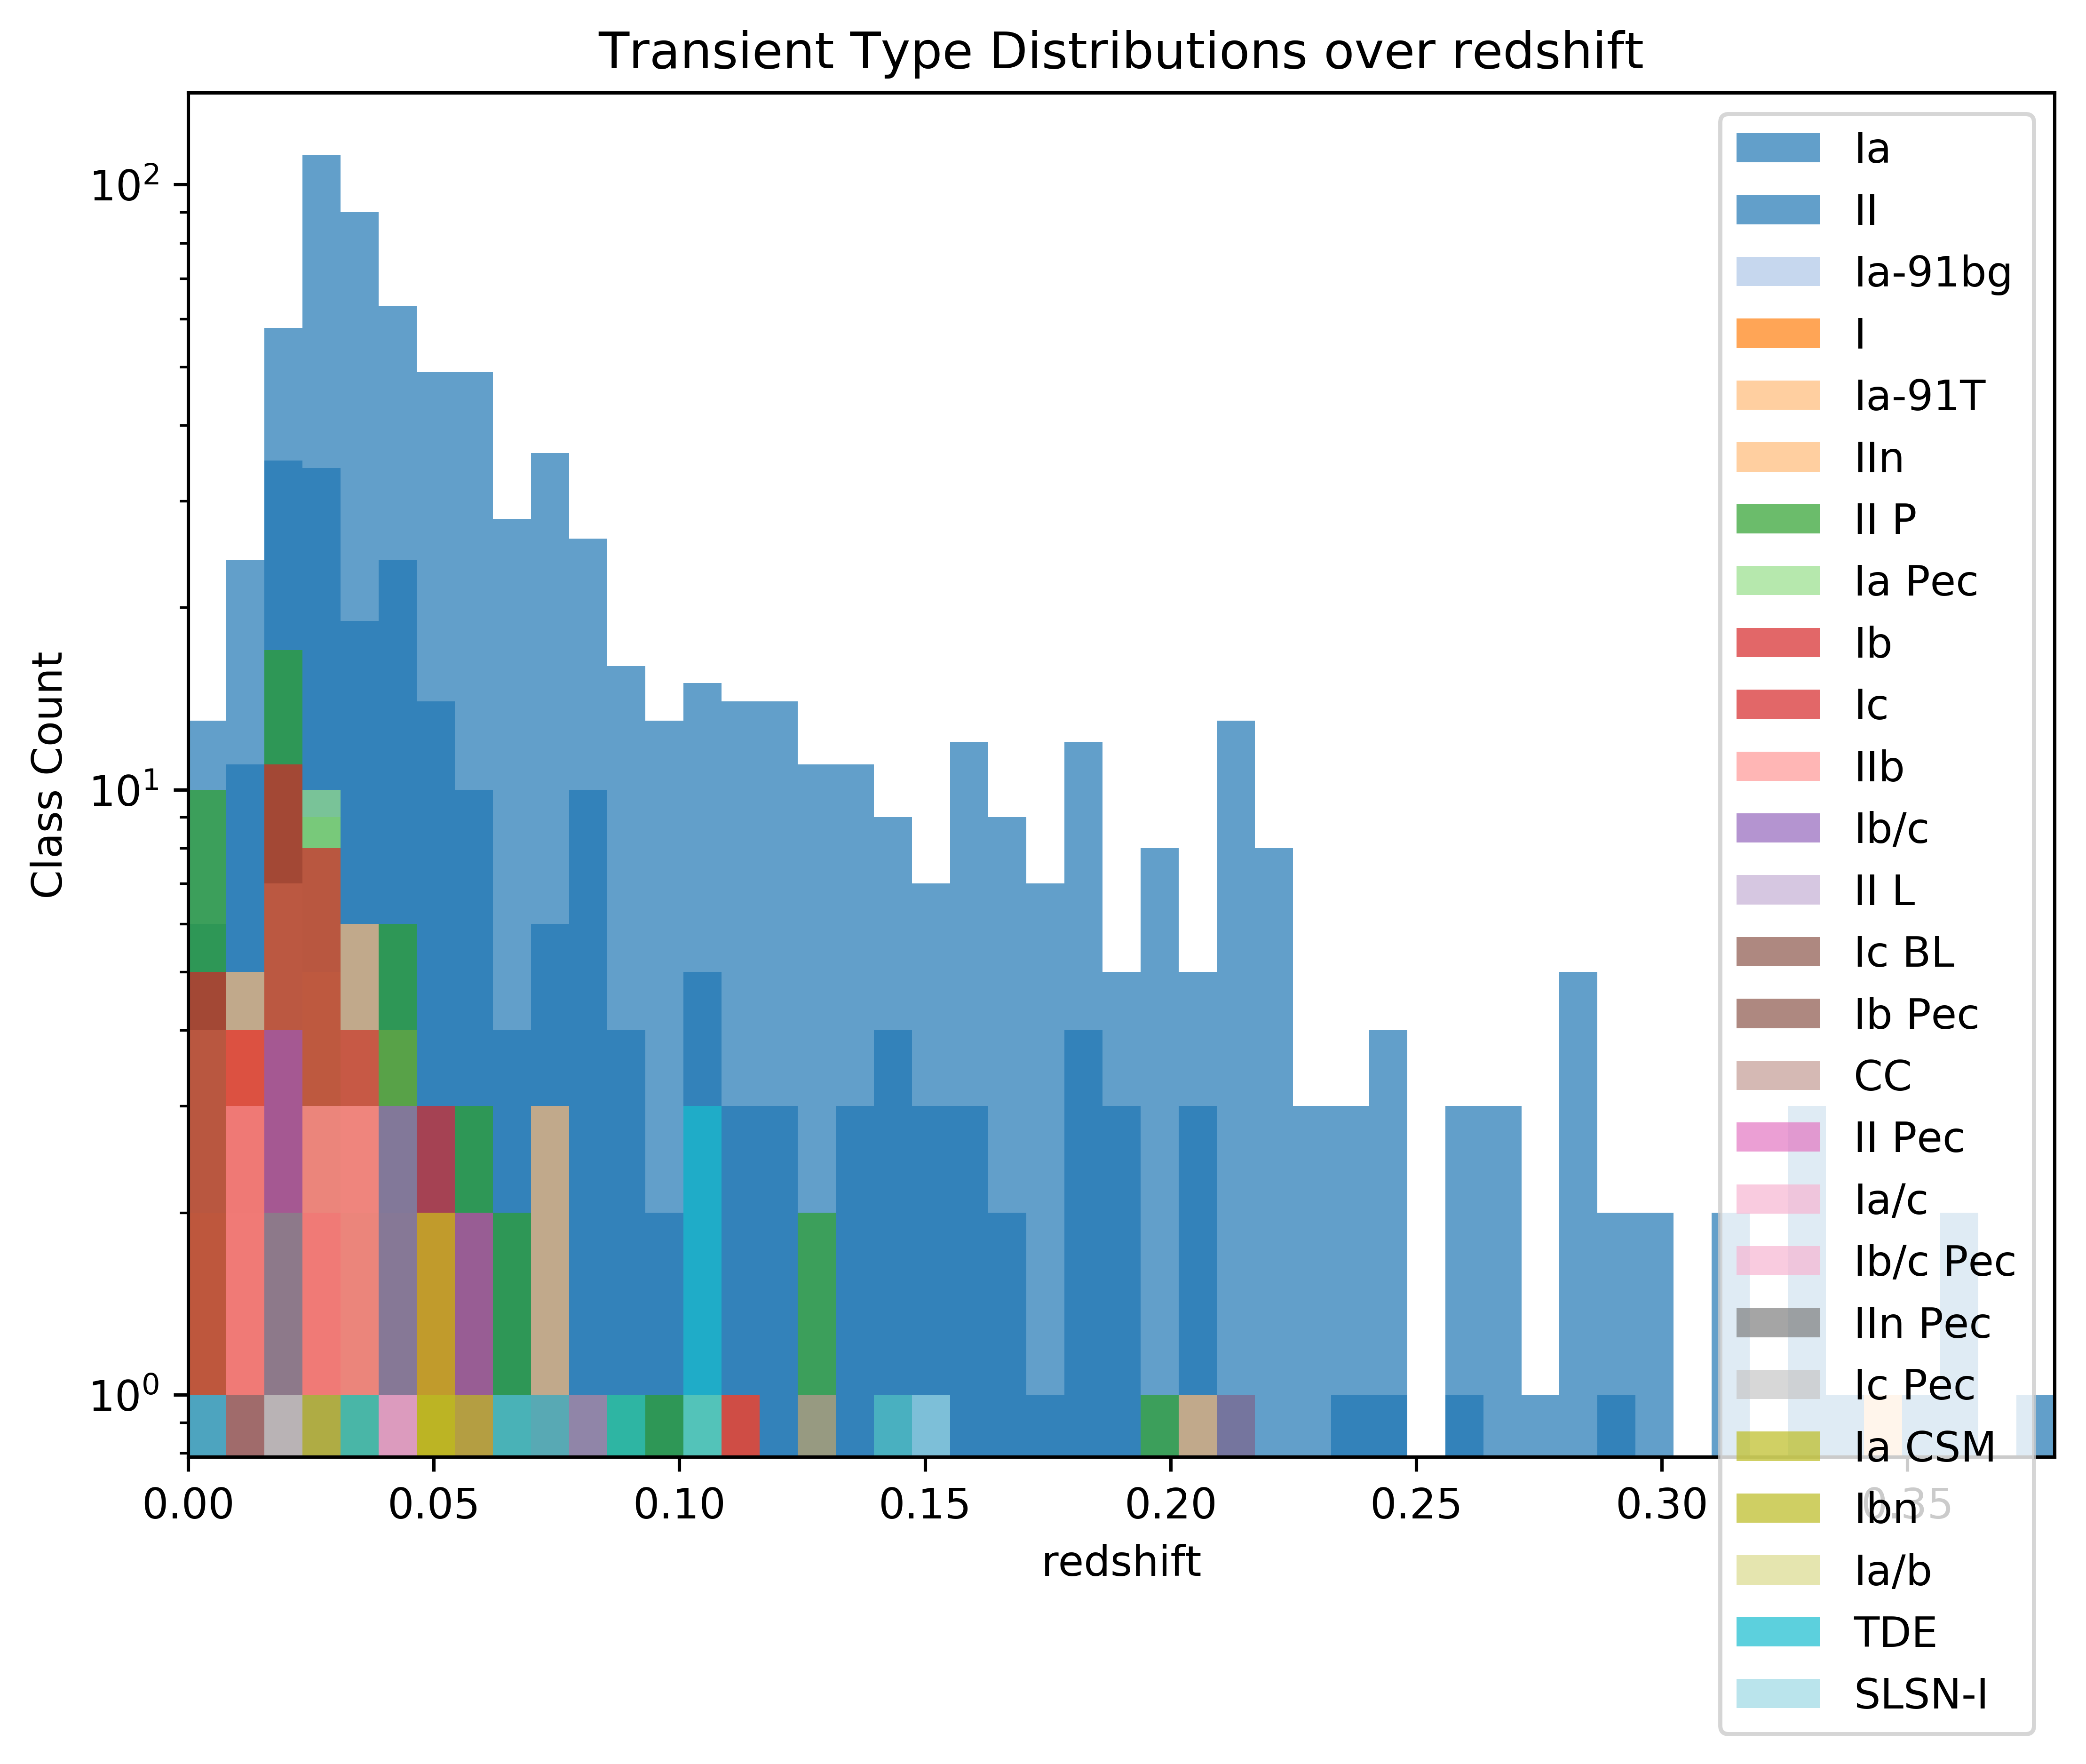


Counts per Class
------------------ 
Other : 1278
TDE : 9

Total: 1287


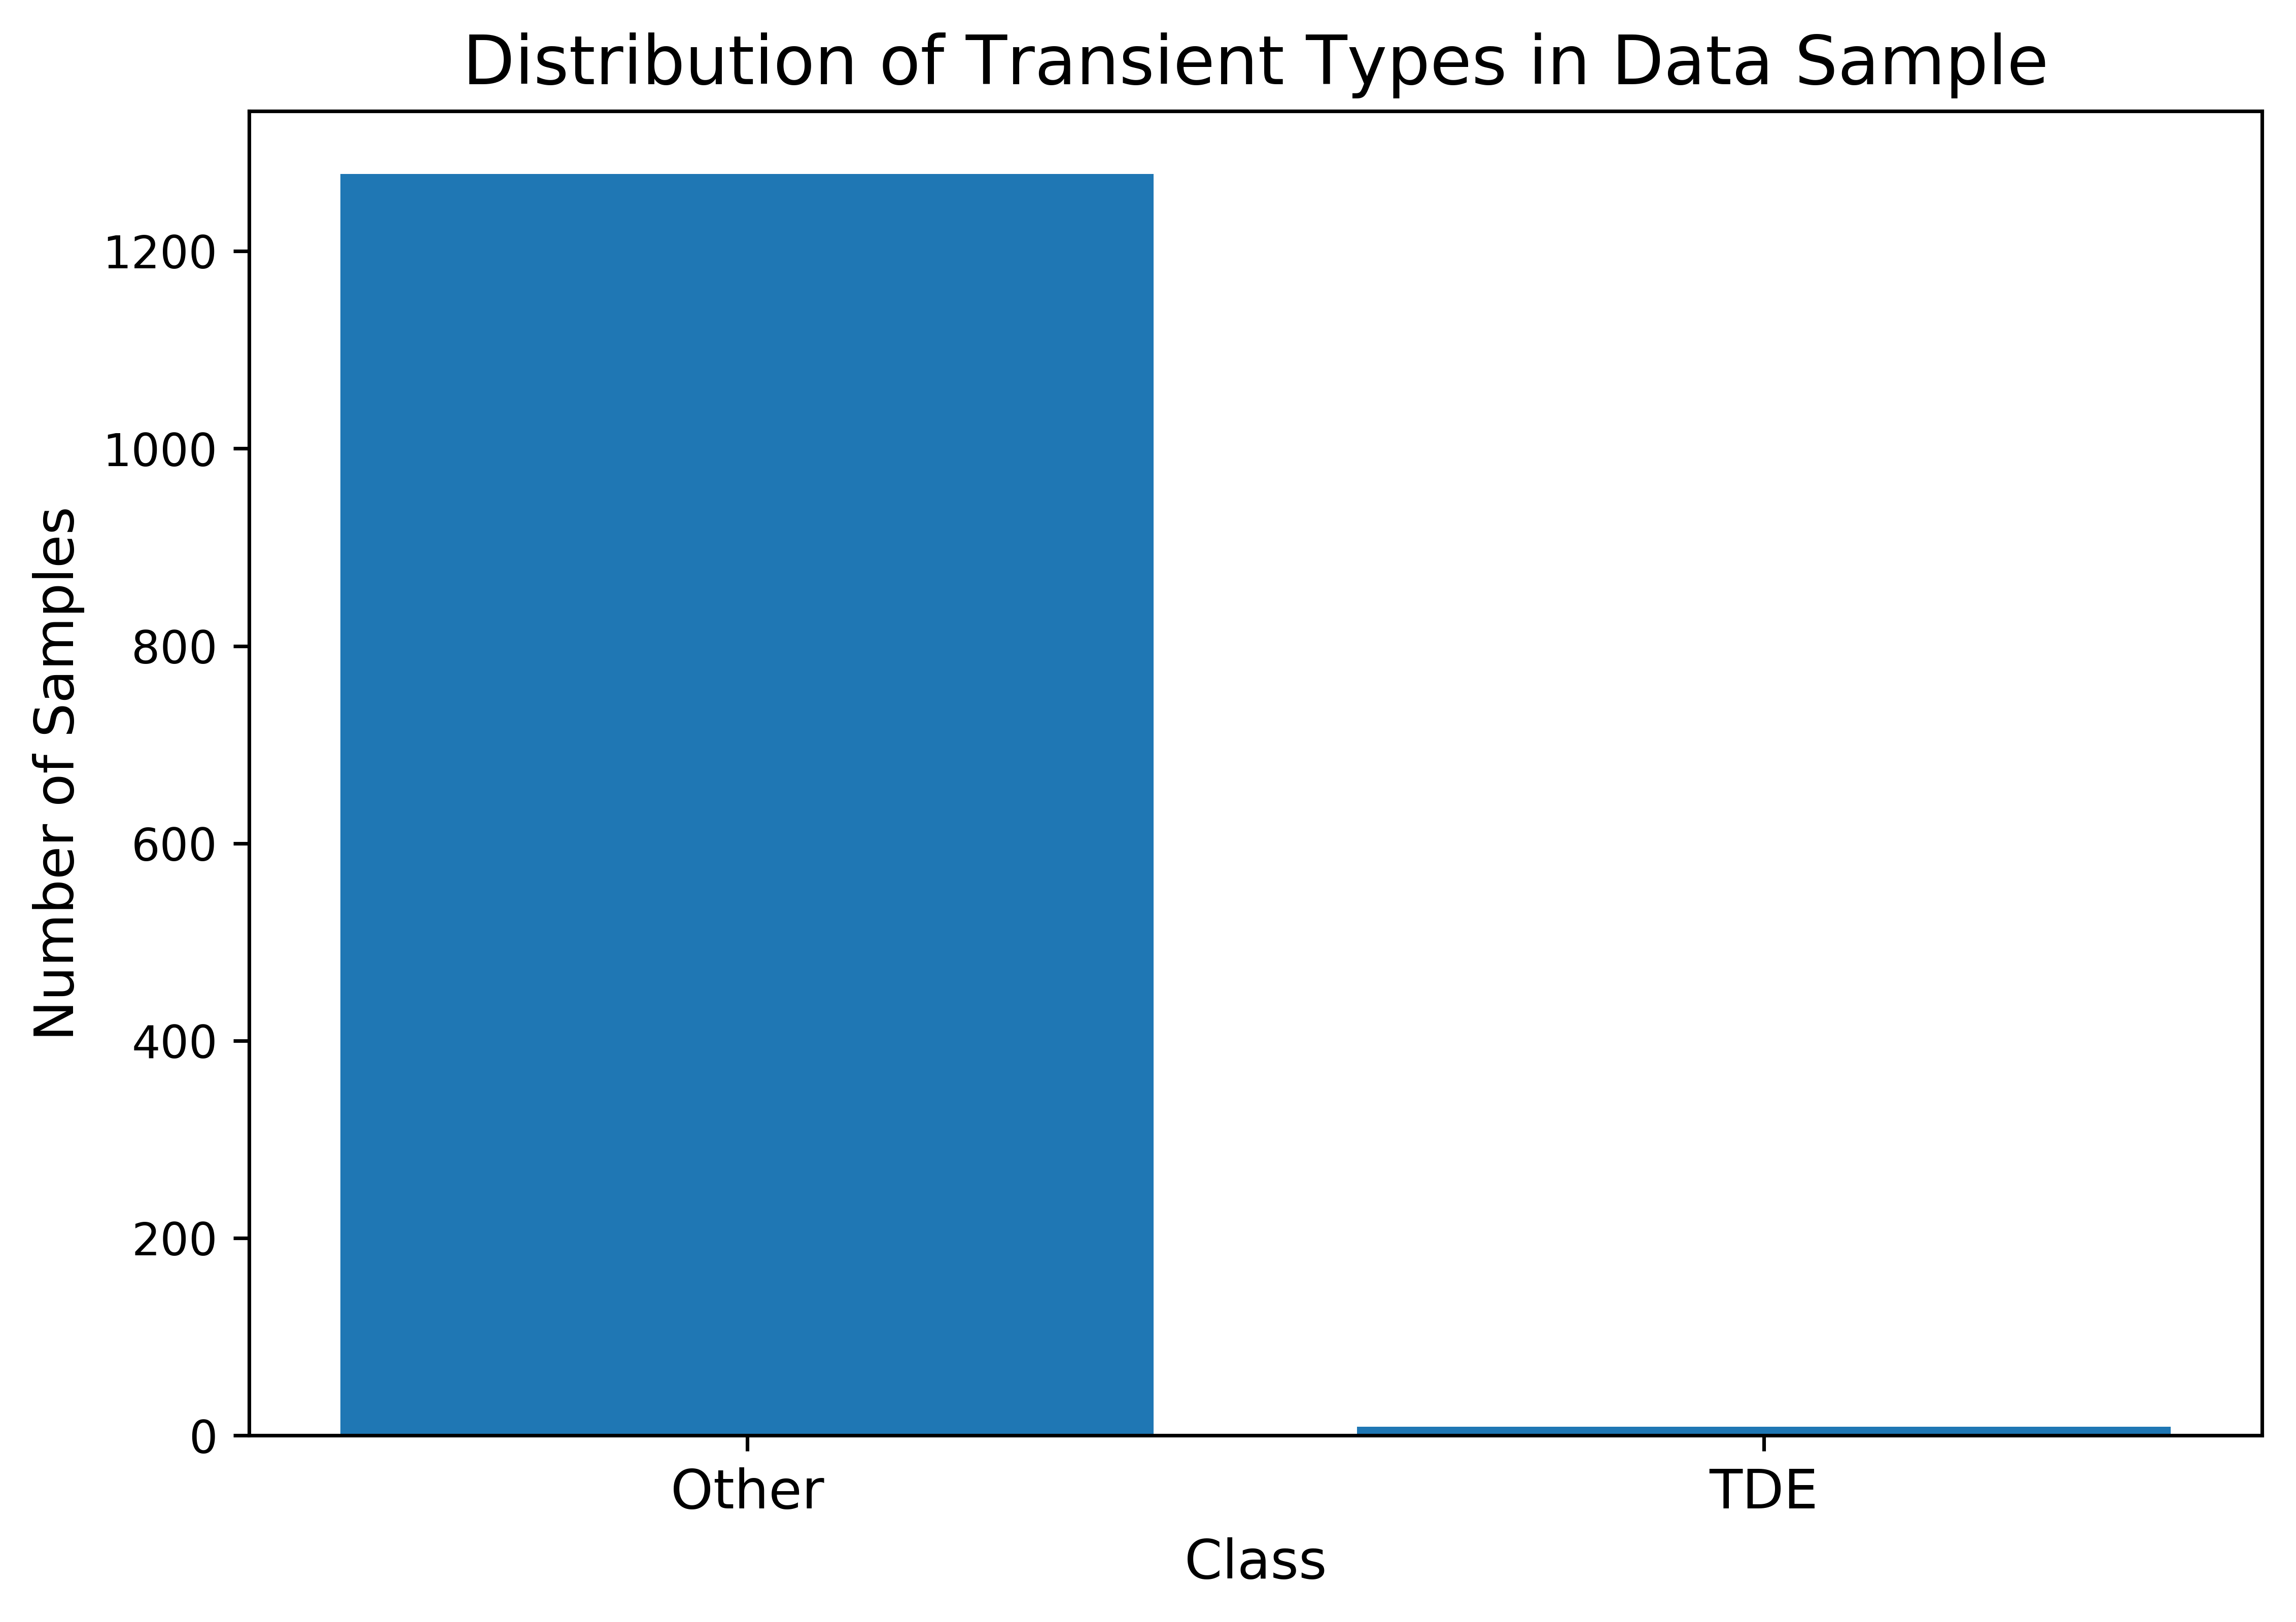


PCA Analysis: Explained Variance Ratio
[0.62531272 0.16215226 0.07136461 0.03678996 0.03047935]

PCA Analysis: Explained Variance Ratio
[0.62680547 0.16376406 0.06647697 0.03859358 0.02981034]

PCA Analysis: Explained Variance Ratio
[0.63711465 0.15288149 0.06975276 0.03743216 0.02966937]


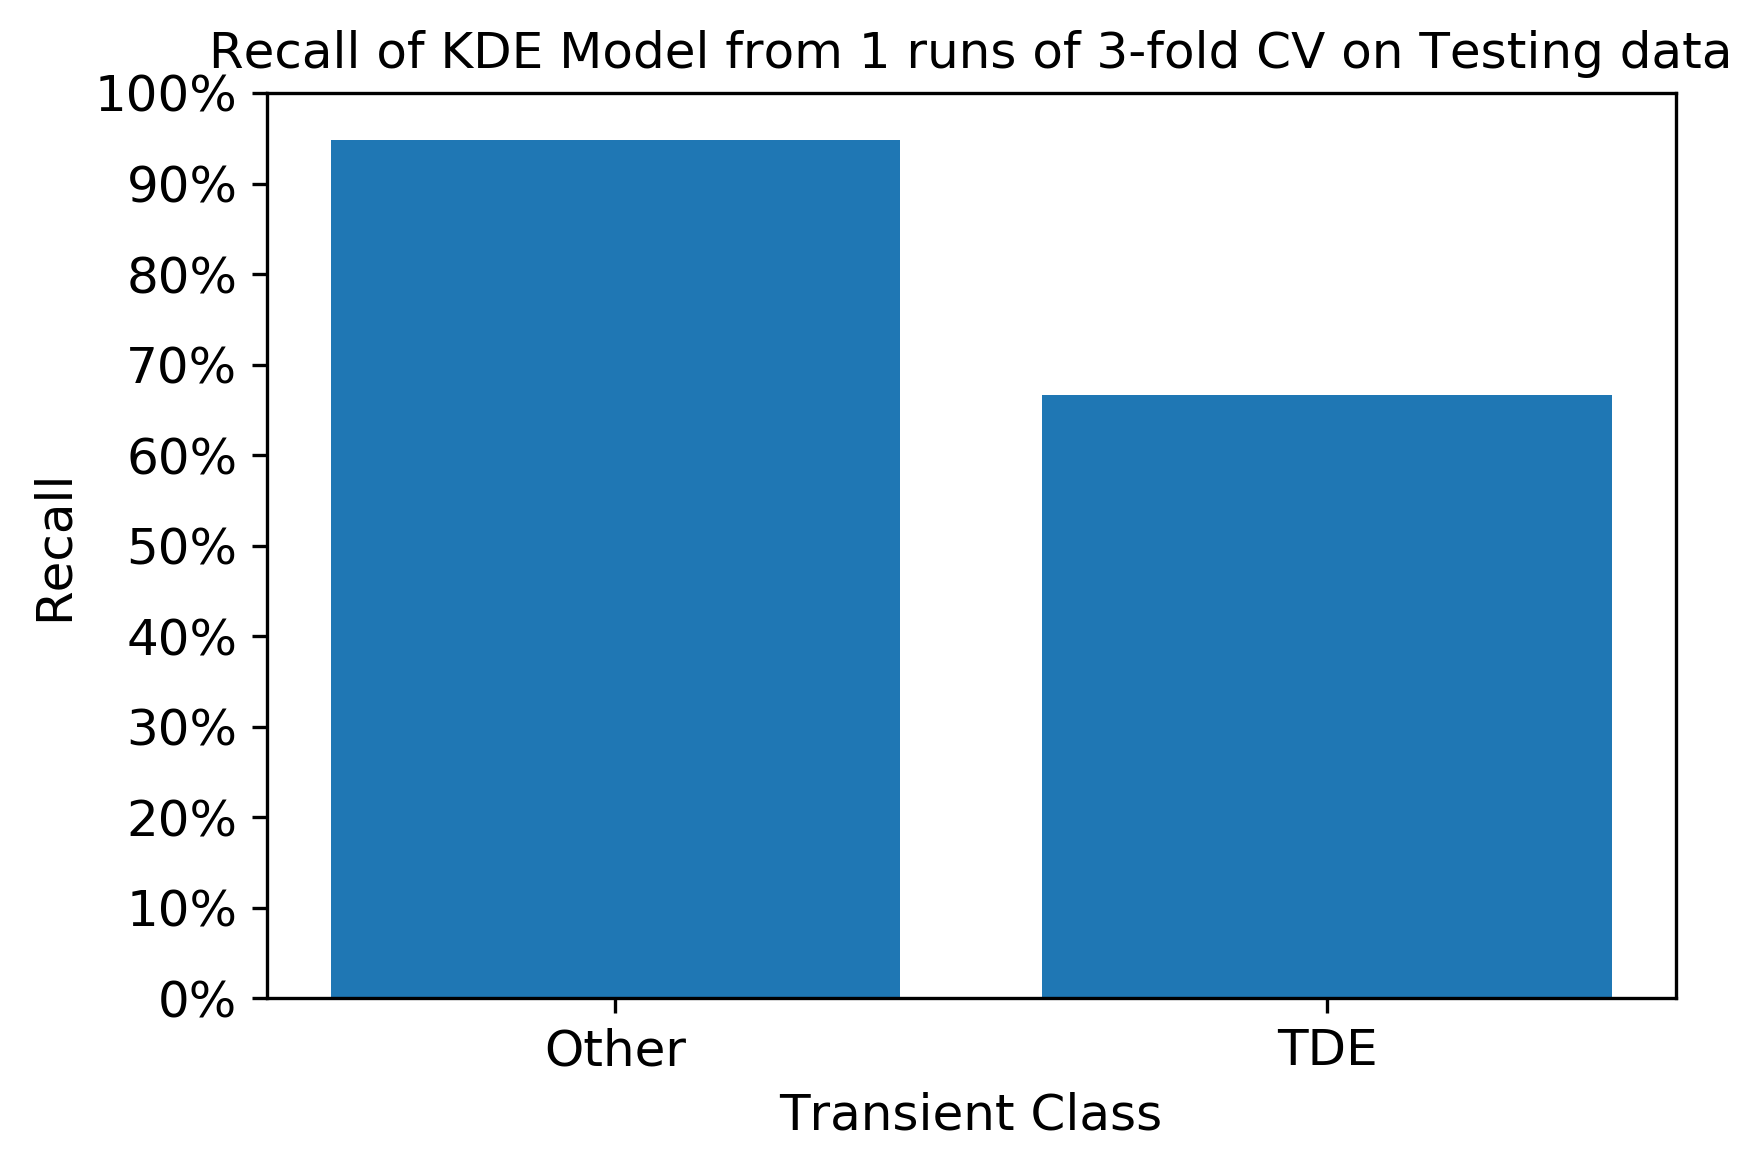

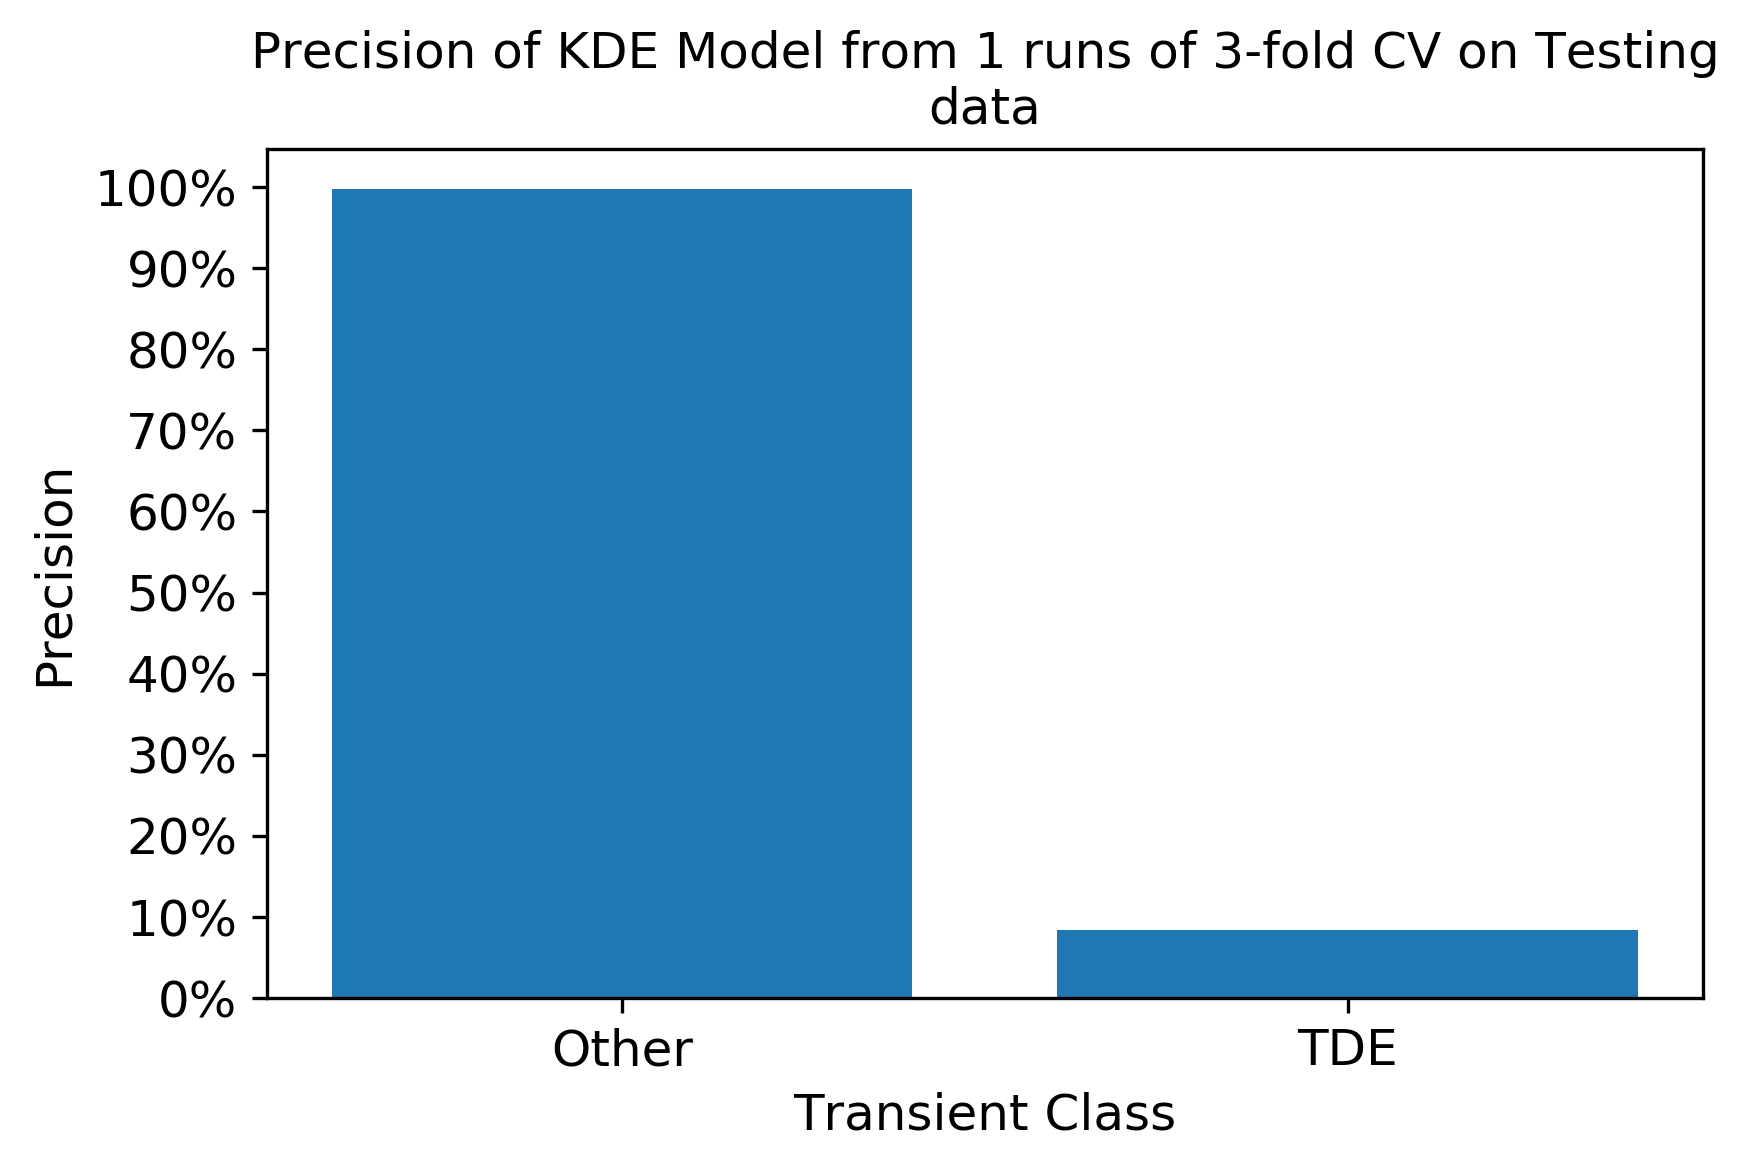

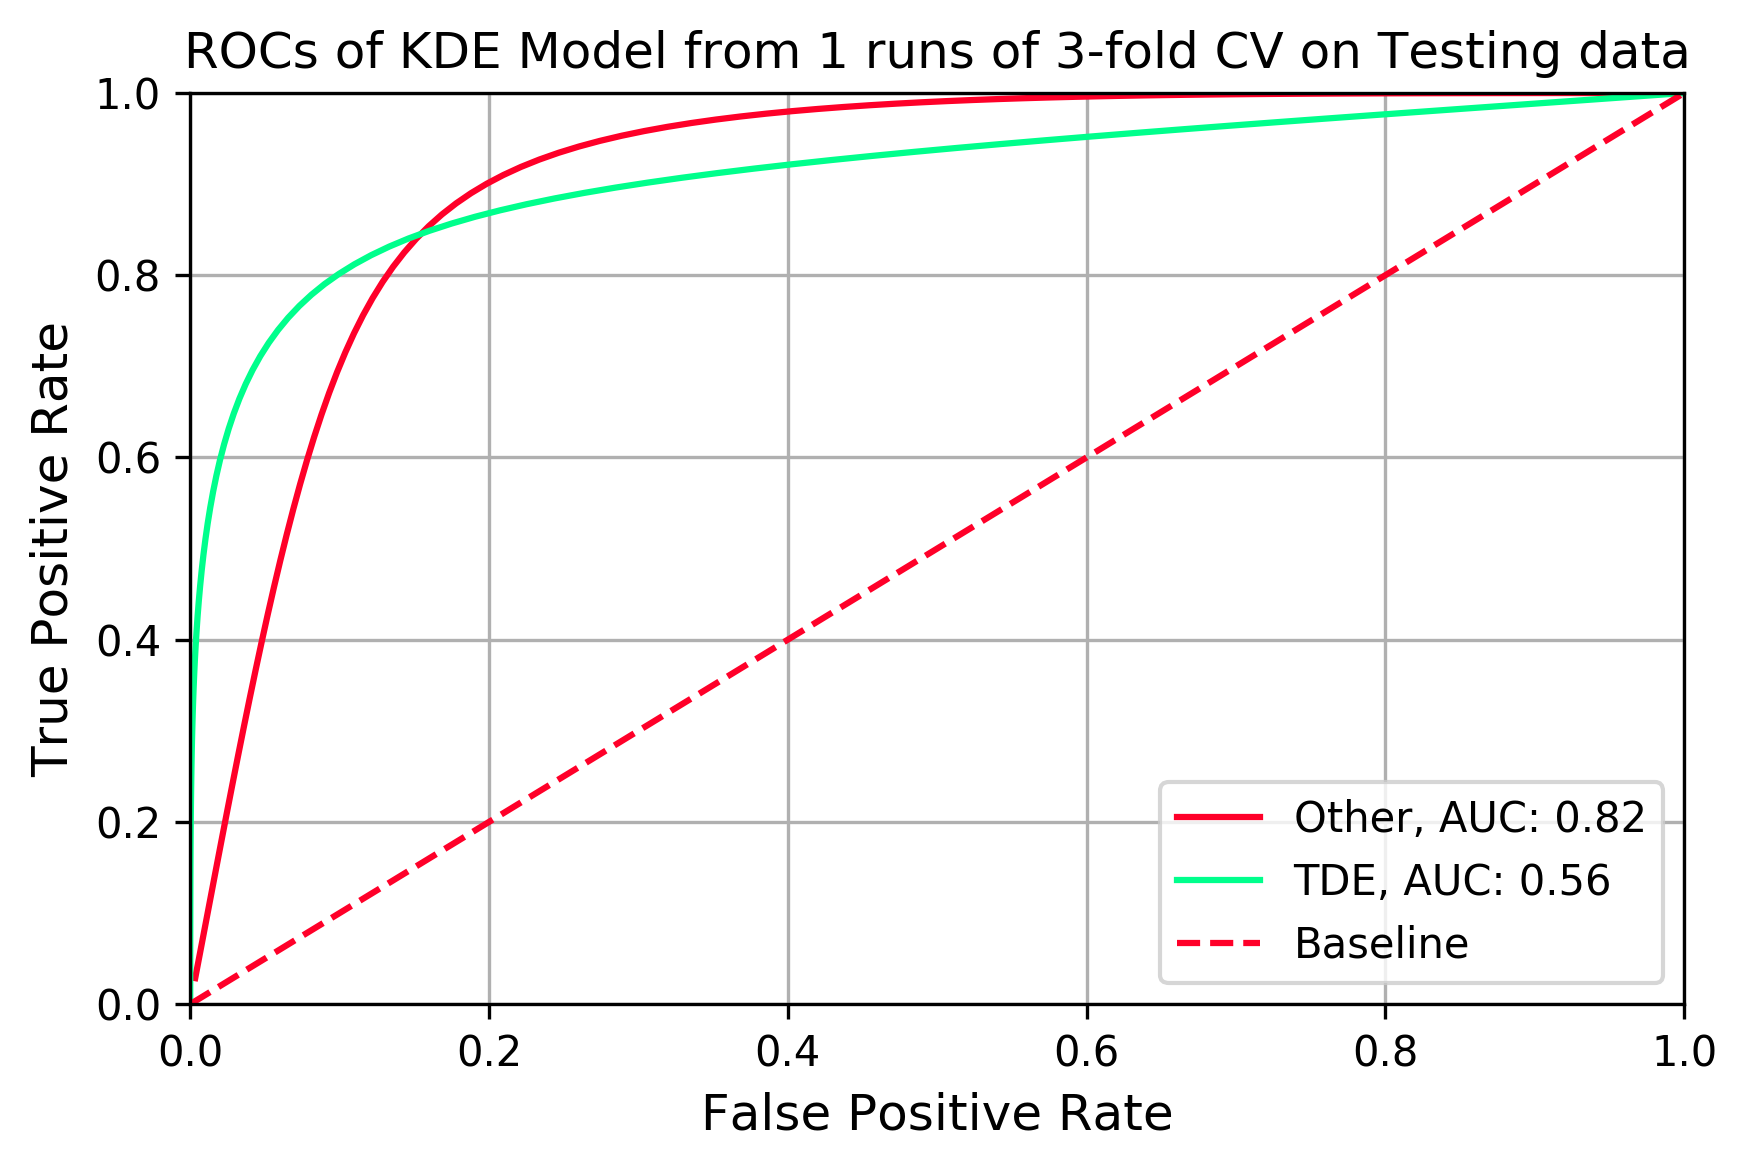

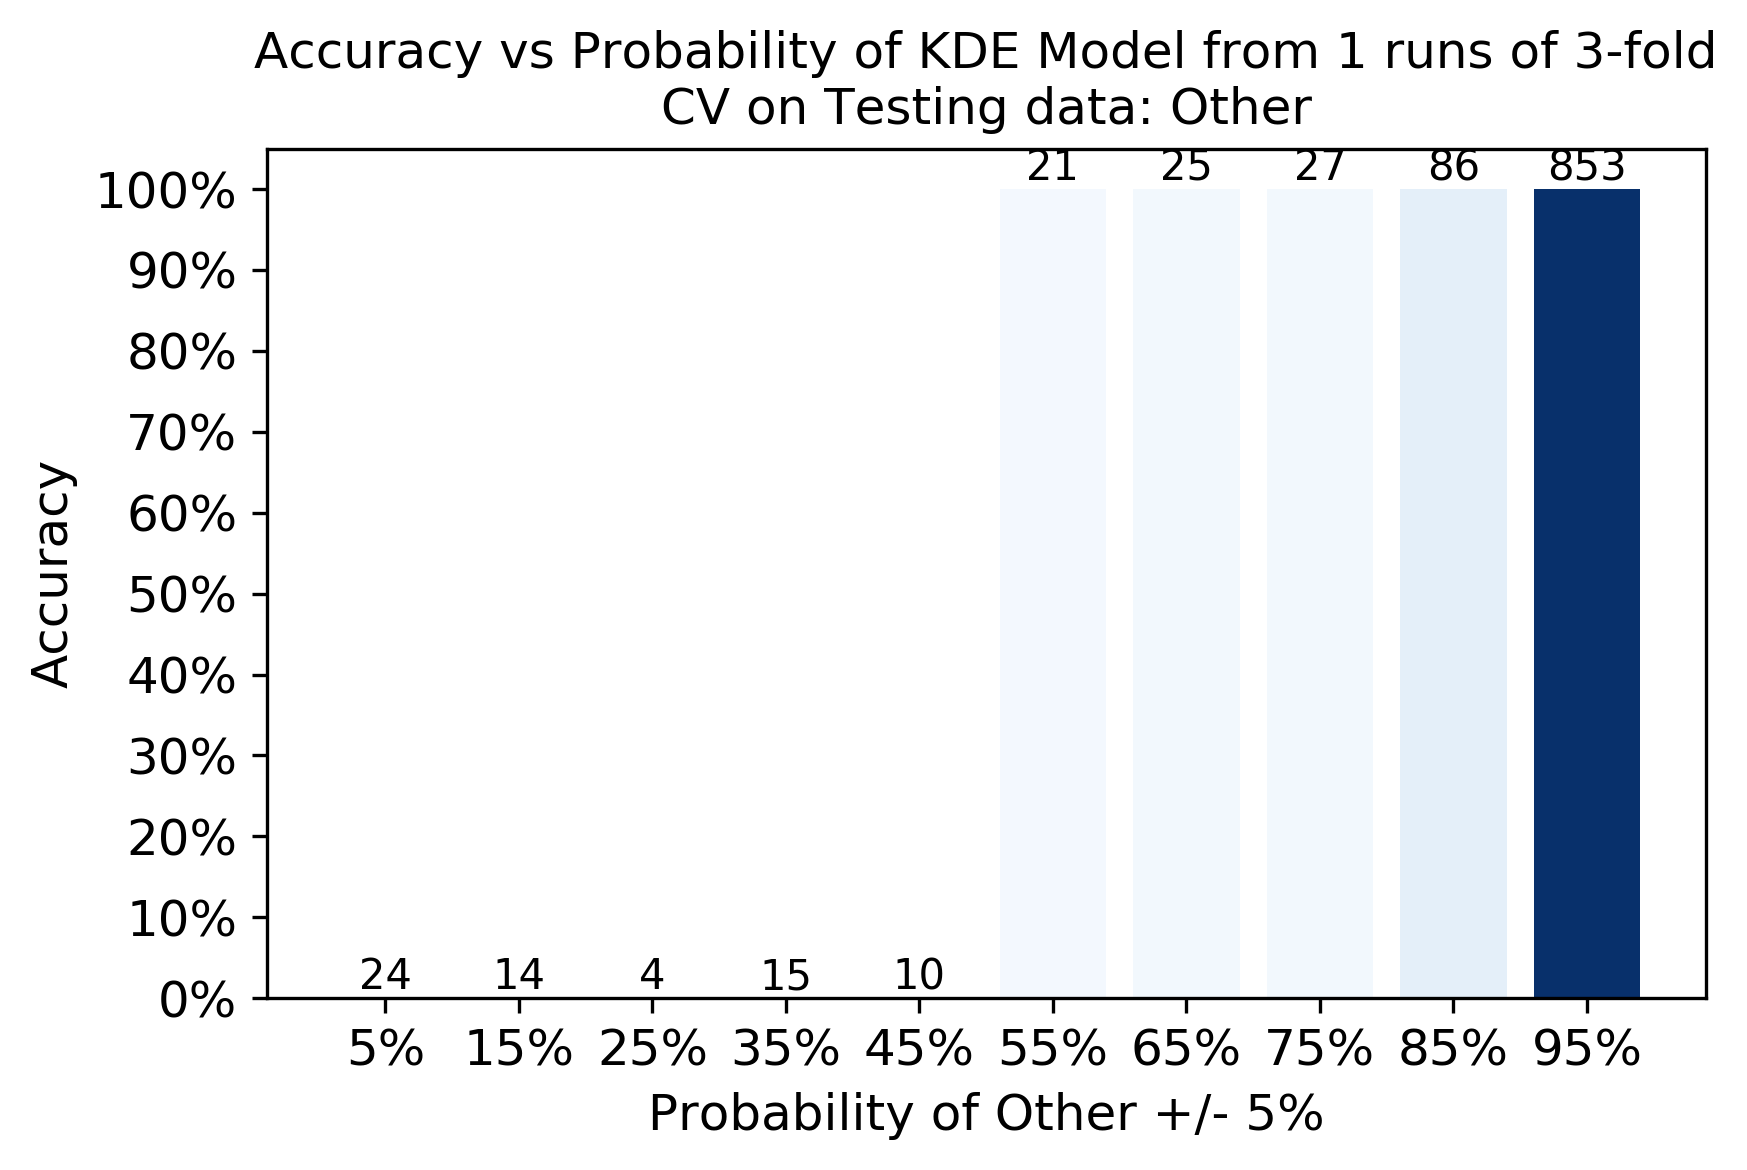

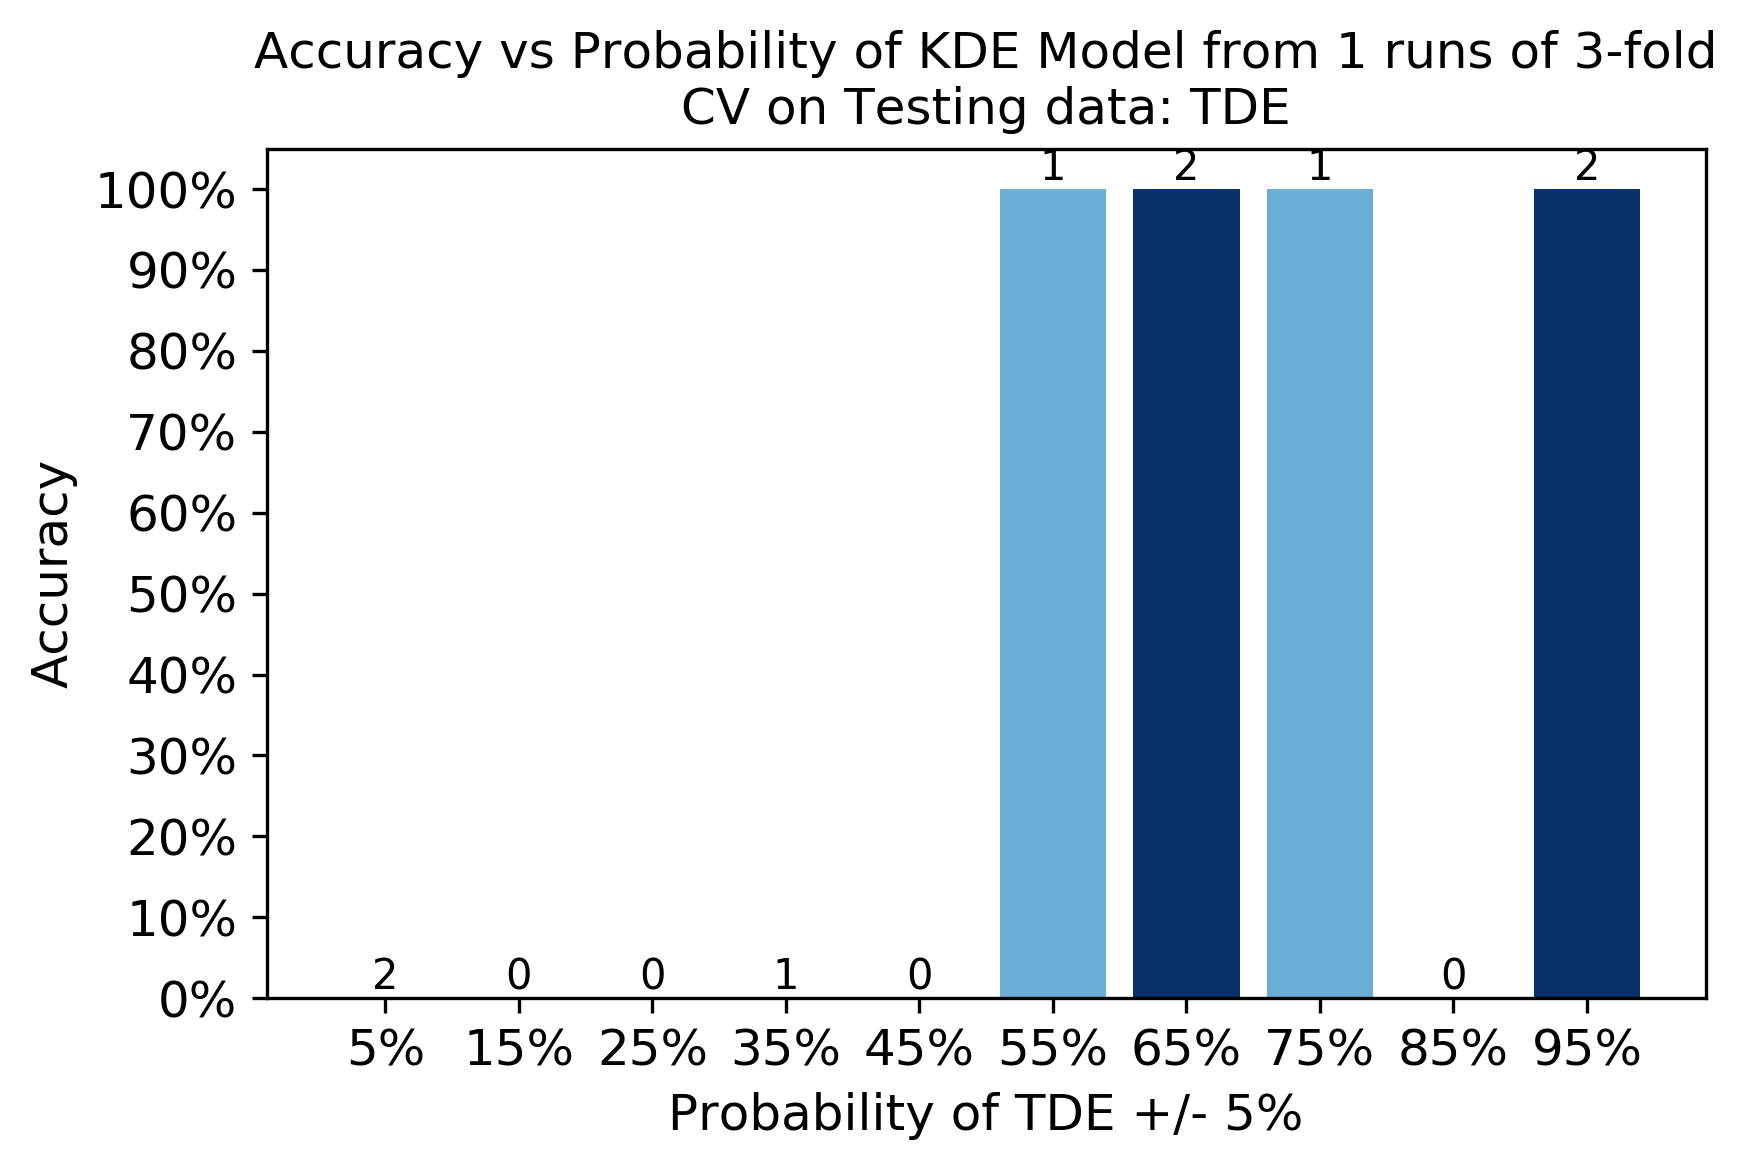

In [1]:
from models.kde_model.kde_model import KDEModel
%matplotlib inline 

kde = KDEModel(
         col_matches = ['WISE', 'GALEX', 'SDSS'],
         folds = 3, 
         transform_features = True, # Colors are computed
         one_all = ['TDE'],
         incl_redshift = True,
         pca = 5,
         num_runs = 1,
         naive = False, # False -> Multi-dimensional kernel
         )
kde.run_model()